<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/aapl_dqn_training_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Protocol Buffer Fix (for TensorFlow)
!pip install --upgrade protobuf
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.30.2 which is incompatible.
google-cloud-aiplatform 1.84.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.2 which is incompatible.
tensorflow 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.30.2 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 6.30.2 which is incompatibl

In [2]:
# Install TensorFlow (latest stable GPU-compatible version)
!pip install tensorflow

# Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

# Reinstall RAPIDS dependencies if needed (optional reset)
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [1]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

# =========================
# Version Checks
# =========================
print(" Library Versions")
print("--------------------")
print(" PyTorch:", torch.__version__)
print(" CUDA:", torch.version.cuda)
print(" cuDF:", cudf.__version__)
print(" cuML:", cuml.__version__)
print(" Dask:", dask.__version__)
print(" Pandas:", pd.__version__)
print(" NumPy:", np.__version__)
print(" SciPy:", scipy.__version__)
print(" LightGBM:", lgb.__version__)
print(" Gymnasium:", gym.__version__)
print(" Stable Baselines3:", stable_baselines3.__version__)

# =========================
#  GPU Check (Torch + NVIDIA)
# =========================
print("\n GPU Availability")
print("--------------------")
print(" PyTorch GPU Available:", torch.cuda.is_available())
print(" GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print(" GPU Name:", torch.cuda.get_device_name(0))


 Library Versions
--------------------
 PyTorch: 2.6.0+cu124
 CUDA: 12.4
 cuDF: 24.12.00
 cuML: 24.12.00
 Dask: 2024.11.2
 Pandas: 2.2.3
 NumPy: 2.1.3
 SciPy: 1.15.2
 LightGBM: 4.5.0
 Gymnasium: 1.1.1
 Stable Baselines3: 2.6.0

 GPU Availability
--------------------
 PyTorch GPU Available: True
 GPU Count: 1
 GPU Name: Tesla T4


In [15]:
# Core Libraries
import gc
import json
import os
import pickle
import random
import sys
import time
from collections import defaultdict, deque
from datetime import datetime

# Data Science Essentials
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd

# Machine Learning & Data Processing
import joblib
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
)
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import MinMaxScaler

# Deep Learning
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model

# RAPIDS Libraries (cuDF & cuML for GPU Acceleration)
import cupy as cp

# Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

# Gym & Trading Environments
import gym
import gymnasium as gym
import gym_anytrading
from gym.spaces import Box
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box as GymBox, Discrete
from gymnasium.wrappers import TimeLimit

# Financial & Visualization Libraries
import IPython.display as display
import yfinance as yf

# PyTorch & Reinforcement Learning Utilities
import torch
import torch.nn as nn
import torch.optim as optim


In [3]:
# Set CUDA Paths (Ensuring GPU Utilization)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [4]:
!nvidia-smi

Sun Mar 30 14:36:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
# Enable CUDA Benchmarking for Faster GPU Computation
torch.backends.cudnn.benchmark = True

# Load Stock Data Directly (No Retry Logic)
def load_stock_data(ticker, period="720d", interval="1h"):
    print(f" Downloading {ticker} stock data...")
    df_live = yf.download(ticker, period=period, interval=interval)
    if not df_live.empty:
        print(" Successfully downloaded stock data!")
        df_live.reset_index(inplace=True)
        return df_live
    print(" Failed to download stock data.")
    return None

# Load Stock Data or Fall Back to Backup Dataset
df_live = load_stock_data("AAPL")
if df_live is None:
    print(" Using previously saved dataset instead.")
    file_path = "/content/drive/My Drive/aaplfeature_engineered_dataset.csv"
    df_live = pd.read_csv(file_path)

df = df_live.copy()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

 Successfully downloaded stock data!


Attempt 1: Downloading AAPL stock data...


[*********************100%***********************]  1 of 1 completed
<ipython-input-20-2632cc6107b9>:253: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(self.df['Close'].iloc[self.current_step])


 Successfully downloaded stock data!
 Using device: cuda
 GPU: Tesla T4
 Model device: cuda:0
 Episode 0/1000, Reward: 489.45, Epsilon: 0.9980
 Episode 25/1000, Reward: 530.21, Epsilon: 0.9493
 Episode 50/1000, Reward: 512.88, Epsilon: 0.9029
 Episode 75/1000, Reward: 412.26, Epsilon: 0.8589
 Episode 100/1000, Reward: 441.71, Epsilon: 0.8169
 Episode 125/1000, Reward: 434.20, Epsilon: 0.7770
 Episode 150/1000, Reward: 536.41, Epsilon: 0.7391
 Episode 175/1000, Reward: 339.00, Epsilon: 0.7030
 Episode 200/1000, Reward: 528.54, Epsilon: 0.6687
 Episode 225/1000, Reward: 243.91, Epsilon: 0.6361
 Episode 250/1000, Reward: 526.53, Epsilon: 0.6050
 Episode 275/1000, Reward: 484.29, Epsilon: 0.5755
 Episode 300/1000, Reward: 489.42, Epsilon: 0.5474
 Episode 325/1000, Reward: 898.43, Epsilon: 0.5207
 Episode 350/1000, Reward: 251.86, Epsilon: 0.4952
 Episode 375/1000, Reward: 59.03, Epsilon: 0.4711
 Episode 400/1000, Reward: 922.08, Epsilon: 0.4481
 Episode 425/1000, Reward: 67.00, Epsilon: 0.

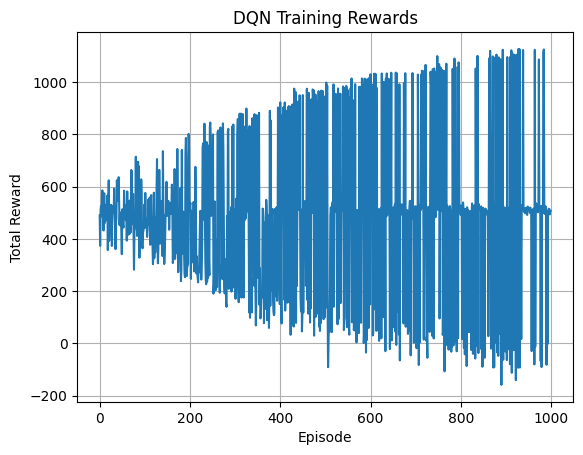

⏱ Training complete in 2068.06 seconds


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
import time
import json
import pandas as pd
import gymnasium as gym
from gymnasium.spaces import Discrete, Box
import yfinance as yf


# Enable CUDA Benchmarking for Faster GPU Computation
torch.backends.cudnn.benchmark = True


#  Download Stock Data Using yfinance
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker} stock data...")
            df_live = yf.download(ticker, period=period, interval=interval)
            if not df_live.empty:
                print(" Successfully downloaded stock data!")
                df_live.reset_index(inplace=True)
                return df_live
            raise ValueError("Downloaded data is empty. Retrying...")
        except Exception as e:
            print(f" Error: {e}. Retrying in {attempt * 5} seconds...")
            time.sleep(attempt * 5)
    print(" Failed to download stock data after multiple attempts.")
    return None


# Load Stock Data or Fall Back to Backup Dataset
df_live = download_stock_data("AAPL")
if df_live is None:
    print(" Using previously saved dataset instead.")
    file_path = "/content/drive/My Drive/aaplfeature_engineered_dataset.csv"
    df_live = pd.read_csv(file_path)

df = df_live.copy()


# Define Q-Network for DQN
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.model(x)


# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"🔧 GPU: {torch.cuda.get_device_name(0)}")


# Define Deep Q-Learning (DQN) Agent
class DQNAgent:
    def __init__(self, env, alpha=3e-4, gamma=0.98, epsilon=1.0, epsilon_decay=0.998, min_epsilon=0.05,
                 buffer_size=80000, batch_size=128, target_update_freq=10):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.batch_size = batch_size
        self.target_update_freq = target_update_freq

        obs_shape = env.observation_space.shape
        self.state_dim = np.prod(obs_shape)
        self.action_dim = env.action_space.n

        self.q_net = QNetwork(self.state_dim, self.action_dim).to(device)
        self.target_q_net = QNetwork(self.state_dim, self.action_dim).to(device)
        self.target_q_net.load_state_dict(self.q_net.state_dict())
        self.target_q_net.eval()

        self.optimizer = optim.Adam(self.q_net.parameters(), lr=self.alpha)
        self.criterion = nn.MSELoss()
        self.replay_buffer = deque(maxlen=buffer_size)

        print(" Model device:", next(self.q_net.parameters()).device)

    def choose_action(self, state):
        state_tensor = torch.tensor(state, dtype=torch.float32, device=device)
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        with torch.no_grad():
            q_values = self.q_net(state_tensor)
        return torch.argmax(q_values).item()

    def train(self, num_episodes=1000, max_steps=1000, plot_rewards=True):
        rewards_per_episode = []
        final_portfolio_values = []  # Track final portfolio value per episode
        profit_loss_per_episode = []  # Store profit/loss for analysis

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            state = state.flatten()
            state_tensor = torch.tensor(state, dtype=torch.float32, device=device)

            total_reward = 0
            portfolio_values = []  # Store portfolio values for each episode
            steps_since_last_sell = 0

            for step in range(max_steps):
                action = self.choose_action(state)

                next_state, reward, done, _, info = self.env.step(action)
                next_state = next_state.flatten()
                next_state_tensor = torch.tensor(next_state, dtype=torch.float32, device=device)

                # Improved Reward Shaping
                price = info["price"]
                if action == 2:  # BUY
                    reward += 0.5  # Reward buying
                elif action == 0:  # SELL
                    reward += 1.2  # Reward profitable sell
                    if reward < 0:
                        reward -= 0.3  # Penalize selling at a loss
                elif action == 1:  # HOLD
                    reward += 0.05
                    if steps_since_last_sell > 50:
                        reward -= 0.2  # Penalize holding too long

                reward_tensor = torch.tensor([reward], dtype=torch.float32, device=device)
                self.replay_buffer.append((state_tensor, action, reward_tensor, next_state_tensor, done))

                state_tensor = next_state_tensor
                total_reward += reward
                portfolio_values.append(info["portfolio_value"])
                steps_since_last_sell += 1 if action == 1 else 0

                if done:
                    break

            # Store Final Portfolio Value and Profit/Loss
            final_portfolio_value = portfolio_values[-1]
            final_portfolio_values.append(final_portfolio_value)
            profit_loss_per_episode.append(final_portfolio_value - self.env.initial_balance)

            # Training from Replay Buffer
            if len(self.replay_buffer) >= self.batch_size:
                for _ in range(5):
                    batch = random.sample(self.replay_buffer, self.batch_size)
                    self._update_q_network(batch)

            # Epsilon Decay
            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

            # Update Target Network
            if episode % self.target_update_freq == 0:
                self.target_q_net.load_state_dict(self.q_net.state_dict())

            rewards_per_episode.append(total_reward)
            if episode % 25 == 0:
                print(f" Episode {episode}/{num_episodes}, Reward: {total_reward:.2f}, Epsilon: {self.epsilon:.4f}")

        # Save Final Portfolio Values and Metrics
        results_dict = {
            "final_portfolio_values": final_portfolio_values,
            "profit_loss_per_episode": profit_loss_per_episode,
            "avg_final_portfolio_value": np.mean(final_portfolio_values),
            "avg_profit_loss": np.mean(profit_loss_per_episode),
        }

        with open("DQN_training_results.json", "w") as f:
            json.dump(results_dict, f, indent=2)

        print(" Portfolio values and metrics saved for analysis.")
        print("\n DQN Training Complete!")

        if plot_rewards:
            plt.plot(rewards_per_episode)
            plt.xlabel("Episode")
            plt.ylabel("Total Reward")
            plt.title("DQN Training Rewards")
            plt.grid()
            plt.show()

    def _update_q_network(self, batch):
        losses = []
        for s, a, r, s_next, done in batch:
            q_val = self.q_net(s)[a]
            with torch.no_grad():
                next_q_val = self.target_q_net(s_next).max()
                target_val = r + (1 - done) * self.gamma * next_q_val
            loss = self.criterion(q_val.unsqueeze(0), target_val)
            losses.append(loss)

        self.optimizer.zero_grad()
        torch.stack(losses).mean().backward()
        self.optimizer.step()


# Define DiscreteTradingEnv for DQN
class DiscreteTradingEnv(gym.Env):
    def __init__(self, df, frame_bound=(10, 100), window_size=10):
        super(DiscreteTradingEnv, self).__init__()
        self.df = df.reset_index(drop=True)
        self.frame_bound = frame_bound
        self.window_size = window_size
        self.current_step = self.frame_bound[0]

        self.initial_balance = 100000
        self.portfolio_value = self.initial_balance
        self.shares_held = 0
        self.last_trade_price = 0

        self.action_space = Discrete(3)  # 0 = SELL, 1 = HOLD, 2 = BUY
        self.observation_space = Box(low=-np.inf, high=np.inf, shape=(window_size + 2,), dtype=np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = self.frame_bound[0]
        self.portfolio_value = self.initial_balance
        self.shares_held = 0
        self.last_trade_price = 0
        return self._next_observation().flatten(), {}

    def _next_observation(self):
        stock_prices = np.array(self.df['Close'].iloc[self.current_step - self.window_size:self.current_step],
                                dtype=np.float32).flatten()
        if len(stock_prices) < self.window_size:
            stock_prices = np.pad(stock_prices, (self.window_size - len(stock_prices), 0), mode='edge')

        portfolio_info = np.array([self.portfolio_value, self.shares_held], dtype=np.float32).flatten()
        obs = np.concatenate((portfolio_info, stock_prices))
        return obs

    def step(self, action):
        self.current_step += 1
        if self.current_step >= len(self.df):
            return self._next_observation().flatten(), 0, True, False, {"portfolio_value": self.portfolio_value}

        price = float(self.df['Close'].iloc[self.current_step])
        reward = 0

        if action == 2 and self.portfolio_value >= price:  # BUY
            self.shares_held += 1
            self.portfolio_value -= price
            self.last_trade_price = price
        elif action == 0 and self.shares_held > 0:  # SELL
            self.portfolio_value += price
            self.shares_held -= 1
            reward = price - self.last_trade_price

        self.portfolio_value += self.shares_held * price
        info = {"portfolio_value": self.portfolio_value, "shares_held": self.shares_held, "price": price}
        return self._next_observation().flatten(), reward, False, False, info

    def render(self):
        """
        Optional: Render the environment (for visualization).
        """
        print(f"Step: {self.current_step}, Portfolio Value: ${self.portfolio_value:.2f}, "
              f"Shares Held: {self.shares_held}, Price: {self.df['Close'].iloc[self.current_step]:.2f}")


# Create environment and instantiate DQN Agent
env_discrete_dqn = DiscreteTradingEnv(df, frame_bound=(10, len(df)), window_size=10)

# Instantiate and Train DQN Agent with Enhanced Performance
dqn_agent = DQNAgent(env_discrete_dqn)

# Train for 1000 episodes
start_time = time.time()
dqn_agent.train(num_episodes=1000, max_steps=1000)
print(f" Training complete in {time.time() - start_time:.2f} seconds")


In [25]:
# Save trained model weights
torch.save(dqn_agent.q_net.state_dict(), "dqn_trained_weights.pth")
print(" Trained model weights saved successfully!")


 Trained model weights saved successfully!


In [ ]:
# Create agent and load trained model weights
dqn_agent = DQNAgent(env_discrete_dqn)
dqn_agent.q_net.load_state_dict(torch.load("dqn_trained_weights.pth"))
dqn_agent.q_net.eval()
print(" Loaded trained model weights successfully!")


 Model device: cuda:0
 Loaded trained model weights successfully!

 Starting Evaluation...


<ipython-input-20-2632cc6107b9>:253: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(self.df['Close'].iloc[self.current_step])


 Evaluation Episode 1/10, Final Portfolio: $74879446.32, Total Reward: 0.00
 Evaluation Episode 2/10, Final Portfolio: $74879446.32, Total Reward: 0.00
 Evaluation Episode 3/10, Final Portfolio: $74879446.32, Total Reward: 0.00
 Evaluation Episode 4/10, Final Portfolio: $74879446.32, Total Reward: 0.00
 Evaluation Episode 5/10, Final Portfolio: $74879446.32, Total Reward: 0.00
 Evaluation Episode 6/10, Final Portfolio: $74879446.32, Total Reward: 0.00
 Evaluation Episode 7/10, Final Portfolio: $74879446.32, Total Reward: 0.00
 Evaluation Episode 8/10, Final Portfolio: $74879446.32, Total Reward: 0.00
 Evaluation Episode 9/10, Final Portfolio: $74879446.32, Total Reward: 0.00
 Evaluation Episode 10/10, Final Portfolio: $74879446.32, Total Reward: 0.00

 Average Final Portfolio Value: $74879446.32
 Average Total Reward: 0.00
 Average Profit/Loss: $74779446.32
 Evaluation Complete! Results saved to 'DQN_evaluation_results.json'


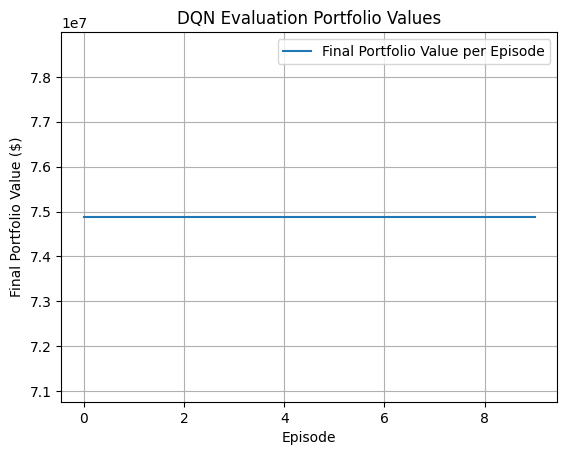

In [31]:
# Create environment and instantiate DQN Agent
env_discrete_dqn = DiscreteTradingEnv(df, frame_bound=(10, len(df)), window_size=10)

# Instantiate DQN Agent
dqn_agent = DQNAgent(env_discrete_dqn)

# Load the trained model weights
dqn_agent.q_net.load_state_dict(torch.load("dqn_trained_weights.pth"))
dqn_agent.q_net.eval()
print(" Loaded trained model weights successfully!")

# Evaluate Without Retraining
dqn_agent.evaluate(num_episodes=10, max_steps=1000)
